### In this document, we recreate the $\Delta R$ between the lepton pairs graph from the Analysis note( Figure 5)

### process all the data sets required in the analysis , we use the same files used in the dark photon Pt analysis. Also we use the runner method to process all the data.

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)

<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")



In [3]:

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        "2mu2e",
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)



Output()

Output()

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

### Here we plot the the $\Delta R$ between the 2 pairs of election for the two selection( no lj selection and 2mu2e)

Text(0.5, 0.98, '$\\Delta R$ between lepton pairs ')

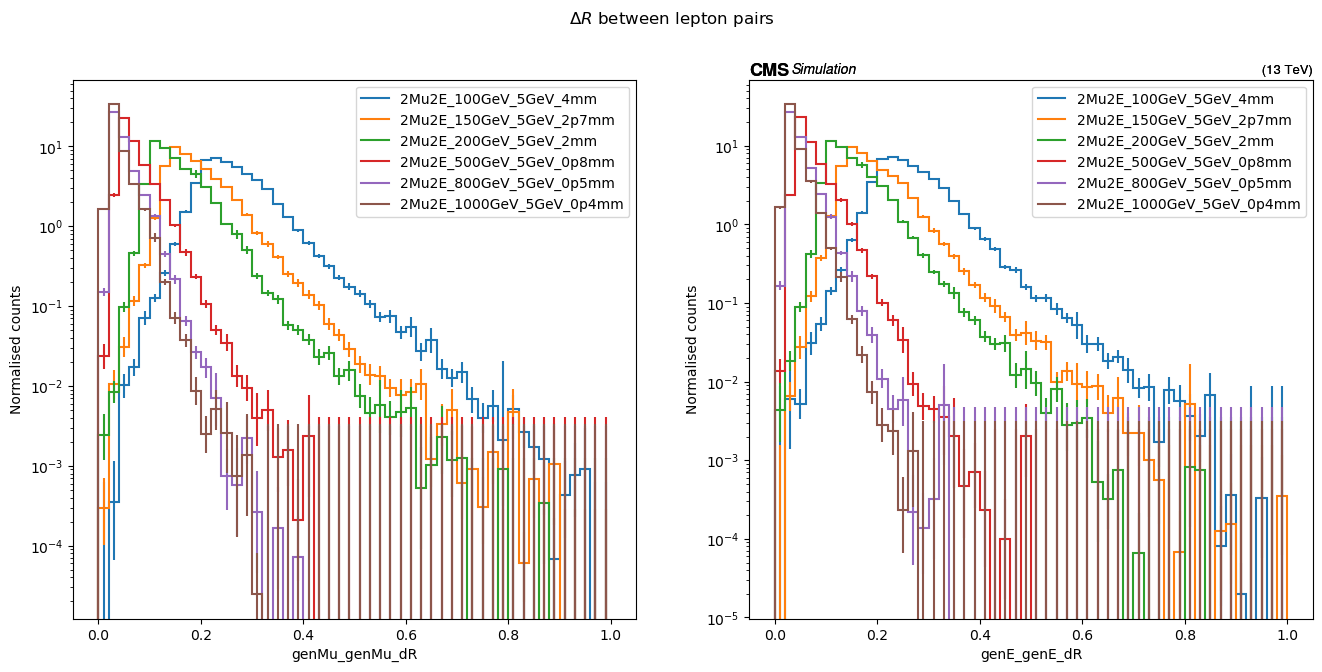

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
ch1 ="baseNoLj"
ch2="2mu2e"
utilities.plot([output["out"][f"{name}"]["hists"]["genMu_genMu_dR"][ch1,:] for name in samples], ax=ax1, density=True)
utilities.plot([output["out"][f"{name}"]["hists"]["genE_genE_dR"][ch1,:] for name in samples], ax=ax2, density=True)
ax1.legend(samples)
ax2.legend(samples)


ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylabel("Normalised counts")
ax2.set_ylabel("Normalised counts")
plt.suptitle(r"$\Delta R$ between lepton pairs ") 

### Here we plot the above same graph for the pairs of muons.

Text(0.5, 0.98, '$\\Delta R$ between lepton pairs in 2mu2e channel')

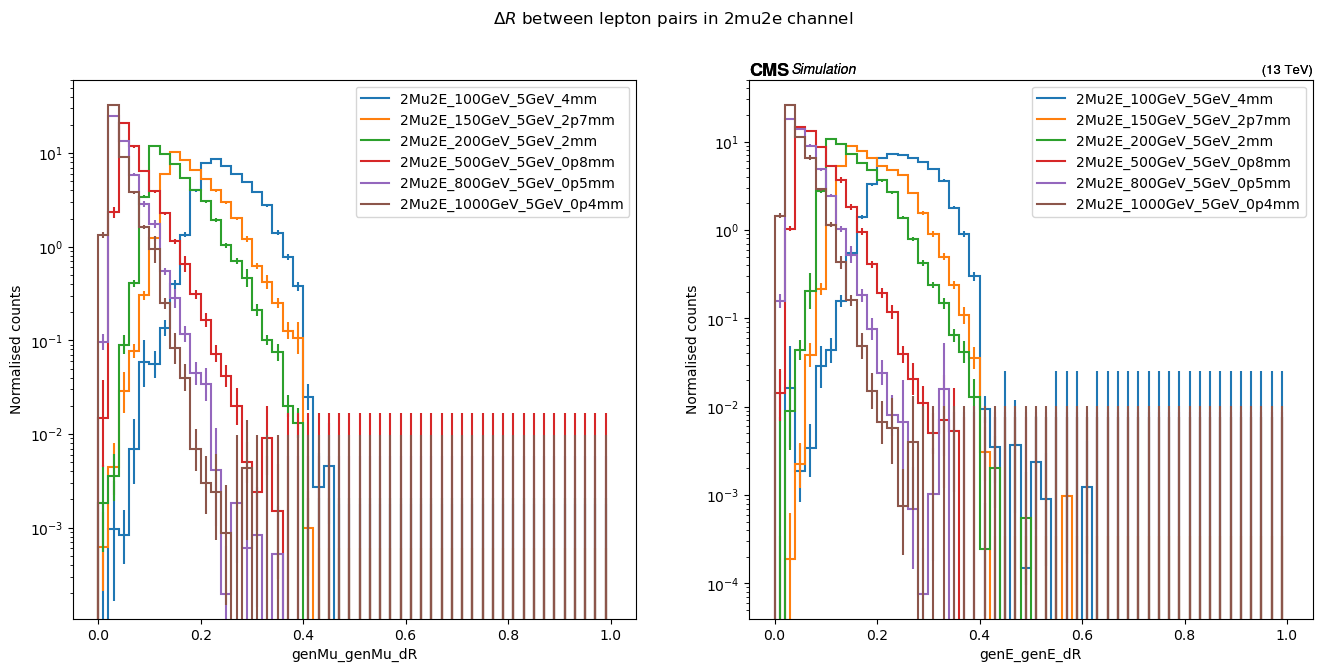

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
utilities.plot([output["out"][f"{name}"]["hists"]["genMu_genMu_dR"][ch2,:] for name in samples], ax=ax1, density=True)
utilities.plot([output["out"][f"{name}"]["hists"]["genE_genE_dR"][ch2,:] for name in samples], ax=ax2, density=True)
ax1.legend(samples)
ax2.legend(samples)




ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylabel("Normalised counts")
ax2.set_ylabel("Normalised counts")
plt.suptitle(r"$\Delta R$ between lepton pairs in 2mu2e channel") 

## Observations we see are the following

###  When the selction is applied the graph is decaying faster. That means the cases with atmost 1 lepton jets have higher $\Delta R$ than that of one with more lepton jets. The "no selection" graph for electron and muon are almost match with that in analysis note figure 4

## Next step is to get the ratio of the two histograms 

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_4mm')

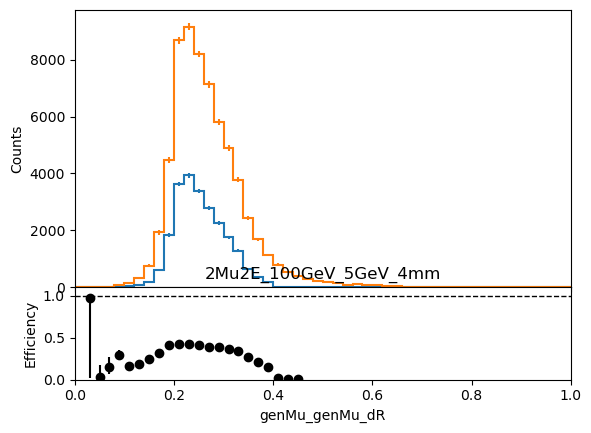

In [6]:

output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genMu_genMu_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genMu_genMu_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_4mm")


#output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch2,:].plot_ratio(
#       output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch1,:],
 #      rp_uncert_draw_type="line",
  #     rp_uncertainty_type="efficiency")


Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_4mm')

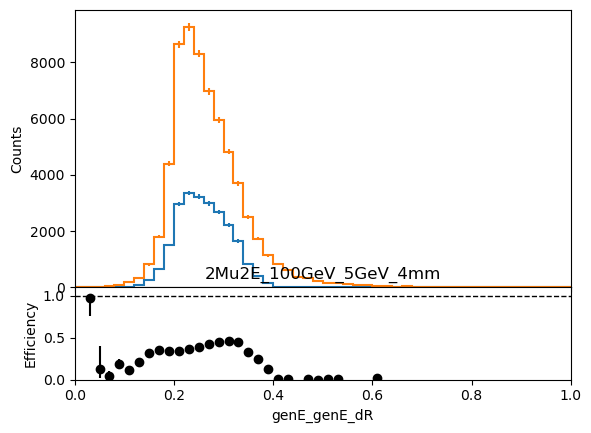

In [7]:
output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genE_genE_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genE_genE_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_4mm")

Text(0.5, 1.0, '2Mu2E_150GeV_5GeV_2p7mm')

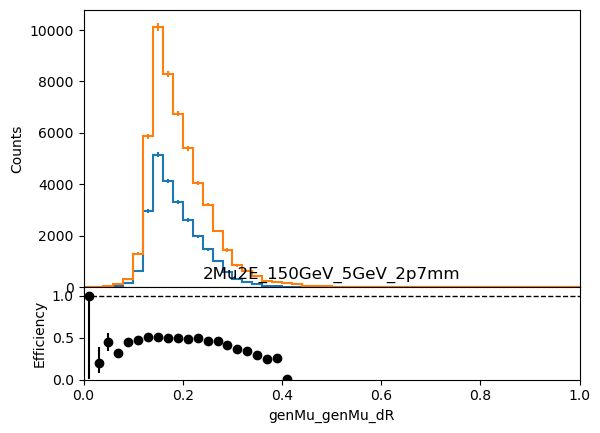

In [8]:
output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_150GeV_5GeV_2p7mm")

Text(0.5, 1.0, '2Mu2E_150GeV_5GeV_2p7mm')

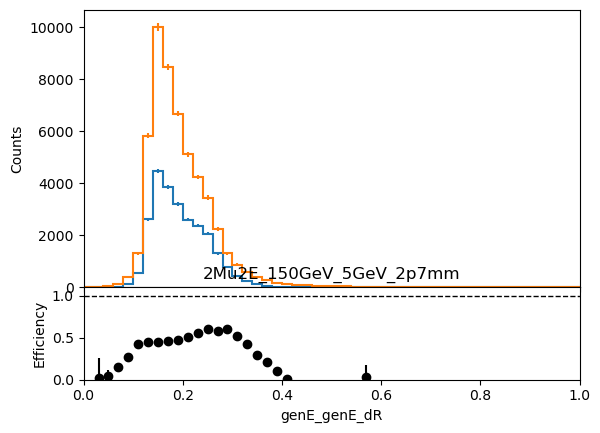

In [9]:
output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genE_genE_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genE_genE_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_150GeV_5GeV_2p7mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93b5afbc10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93b5efe580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93b4cb88e0>, errorbar=<ErrorbarContainer object of 3 artists>))

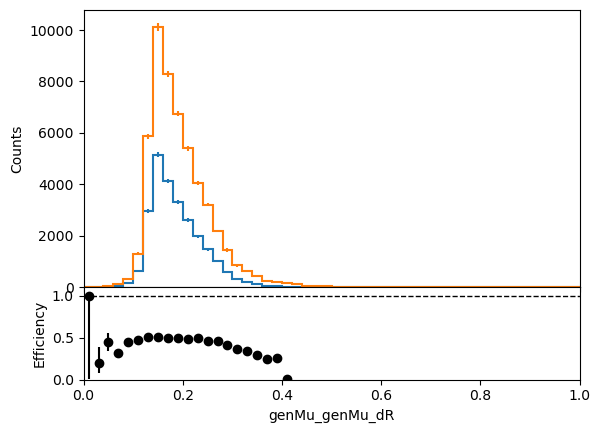

In [10]:
output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_2mm')

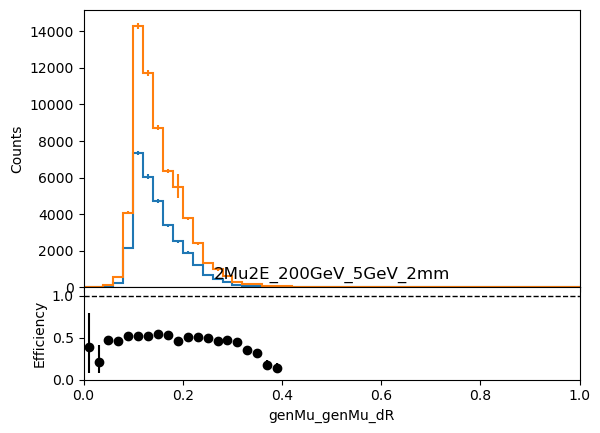

In [11]:
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_genMu_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_genMu_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_2mm")

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_2mm')

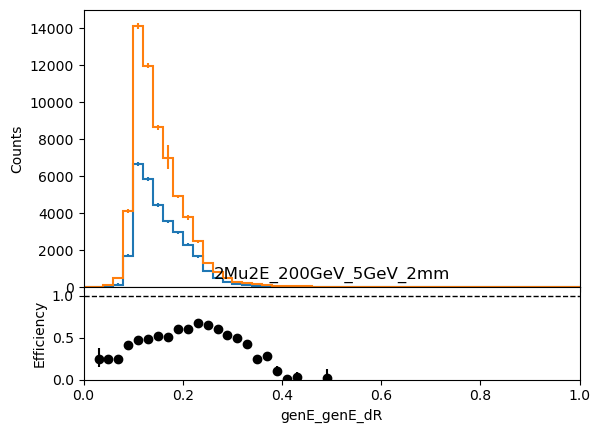

In [12]:
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_genE_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_genE_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_2mm")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_0p8mm')

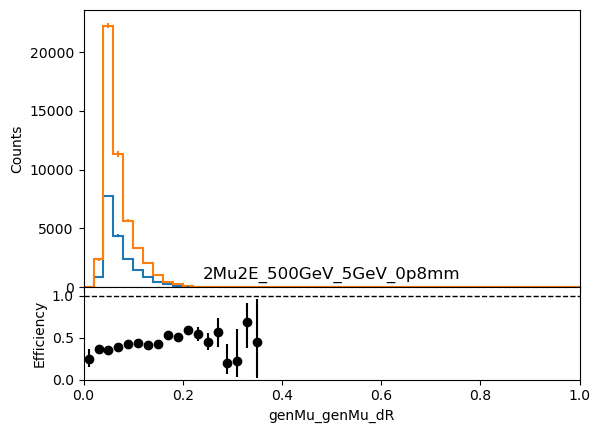

In [13]:
output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genMu_genMu_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genMu_genMu_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_0p8mm")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_0p8mm')

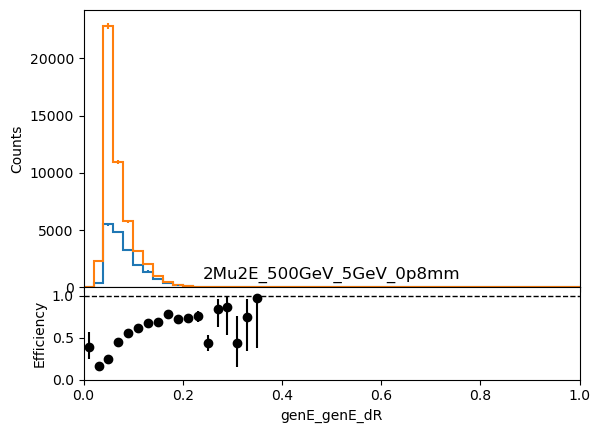

In [14]:
output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genE_genE_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genE_genE_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_0p8mm")

Text(0.5, 1.0, '2Mu2E_800GeV_5GeV_0p5mm')

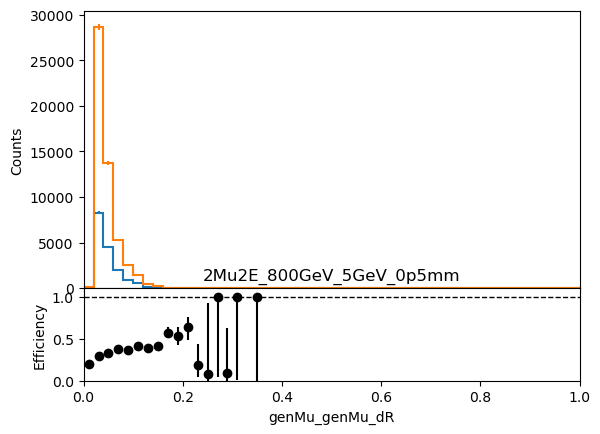

In [15]:
output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genMu_genMu_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genMu_genMu_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_800GeV_5GeV_0p5mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f939eaa8430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f939ea3ebe0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f939ea3e3d0>, errorbar=<ErrorbarContainer object of 3 artists>))

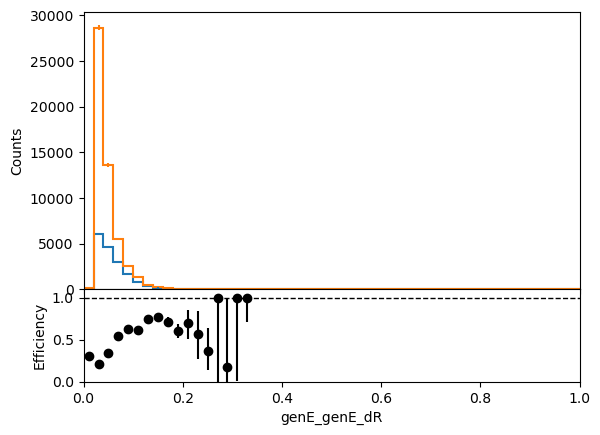

In [16]:
output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genE_genE_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genE_genE_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       fp_scale="log",
       )
#plt.title("2Mu2E_800GeV_5GeV_0p5mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_0p4mm')

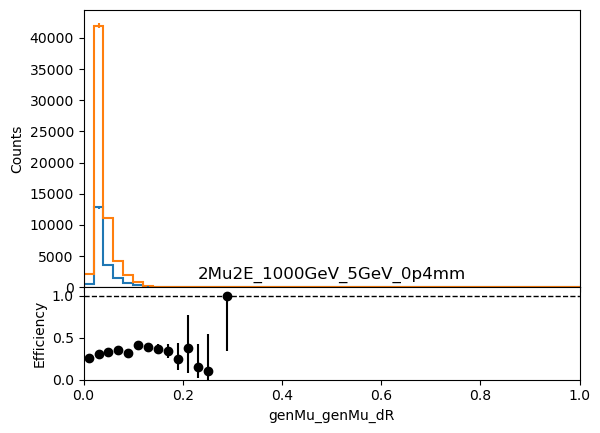

In [17]:
output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genMu_genMu_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genMu_genMu_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_0p4mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_0p4mm')

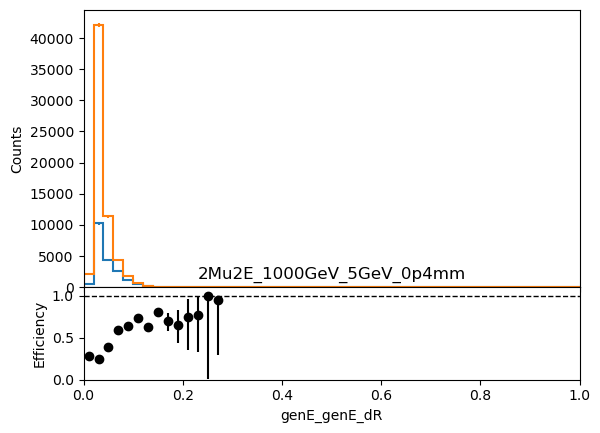

In [18]:
output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genE_genE_dR"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genE_genE_dR"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_0p4mm")

## Observations from the ratio plot 
### 1) As expected values are going to zero after $\Delta R =0.4$.
### 2) Both muon and electron show different behaviour.
### 3)Efficiency is low for lower values of $\Delta R$.
### 4)For all electron plots, we see a peak and then it goes to zero.
### 5)Efficiency is mostly constant throughout the region of interest.
### 6) we cannot makeout a general shape out of these plots.
### 7) Need to check the reliablity of the graph in both ends.
### 8) As the mass increases the efficiency slightly increases for electron.
### 9) 